In [1]:
import numpy as np
import h5py
import pandas as pd

import matplotlib.pyplot as plt

# import the ribbon model
from  ribbonv2 import *

## Loading the data

In [2]:
"""
load data cell 1
"""

filename = 'data/cell1.hdf5'
f = h5py.File(filename, 'r')

for item in f.attrs:
    print(item, f.attrs[item])
    
stim_binary = f['stim_binary'][:]
stim_gauss = f['stim_gauss'][:]

r_binary = f['r_binary'][:]
r_gauss = f['r_gauss'][:]

f.close()


# choose data
light = stim_binary
data = r_binary

# stim time with time resolution of dt =1ms
stimT = np.arange(0, len(light),1)/1000

# data time with time resolution of dt =10ms
dataT = np.arange(0, len(light),10)/1000


dt[ms] for r = 10
dt[ms] for stim = 1
info: Stim and vesicle release of one cell, 4 recordings per stim, binned sum for r but raw for stim (dt=1)


In [4]:
"""
load data cell 2
"""

filename = 'data/cell2.hdf5'
f = h5py.File(filename, 'r')

for item in f.attrs:
    print(item, f.attrs[item])
    
#stim_binary = f['stim_binary'][:]
#stim_gauss = f['stim_gauss'][:]

r_binary_2 = f['r_binary'][:]
#r_gauss = f['r_gauss'][:]

f.close()


# choose data
#light = stim_binary
#data = r_binary

# stim time with time resolution of dt =1ms
#stimT = np.arange(0, len(light),1)/1000


dt[ms] for r = 10
dt[ms] for stim = 1
info: Stim and vesicle release of one cell, 2 recordings per stim, binned sum for r but raw for stim (dt=1)


### fitted values:
(for cell1 of the dataset, representing the mode of the 1d marginals as well as the parameters for the best occured simulation)

In [3]:
# for binary data

paramsfit_binary = np.array([40.89458397,  1.03303613,  0.10640396,  0.37593841,  7.        ,
       50.        ,  0.28926087,  0.85838859])

bestparams_binary = np.array([41.84855288,  1.04247572,  0.09913873,  0.16969874,  7.        ,
       50.        ,  0.31657034,  0.86622255])


# for gauss data
paramsfit_gauss = np.array([4.34840929e+01, 8.20404223e-01, 5.42604275e-03, 3.94179516e-01,
       7.00000000e+00, 5.00000000e+01, 2.25251225e-01, 5.43949703e-01])

bestparams_gauss = np.array([4.35205329e+01, 8.26258255e-01, 3.14768104e-03, 3.93963734e-01,
       7.00000000e+00, 5.00000000e+01, 2.27900345e-01, 5.39189332e-01])

## run simulations

In [4]:
"""
Run multiple simulations with the fitted values
# choose therefore paramsfit

binary
"""


# choose stimulus
# could be arbitrary stimulus scaled to [0,1], and dt=1ms. 
# but simulation returns a priori release with dt=10ms.
stim = stim_binary


# choose parameters
"""
# parameter e
k = params[0] # NL slope
x0 = params[1] # NL half activation
dockP = params[2] # parameter for refilling dock (p for binomial distribution)
ribbonLambda = params[3] # refilling of ribbon, lambda of Poisson distribution
dockMax = params[4] # maximal capacity of dock (set to maximal observed released vesicles in the paper, 7-8)
ribbonMax = params[5] # maximal capacity of ribbon (set to 50 in the paper)
rho = params[6] # correlation parameter for betabinomial release
gamma = params[7] # kernel scale
"""
params = paramsfit_binary
#params[2] = .03
#params[3] = .01
#params[4] = 10
#params[5] = 40

# number of simulations
nsim = 10
celltype = -1 # -1 representing an OFF cell, +1 an ON cell

fit = np.zeros((nsim,len(data[0])))

for i in range(nsim):
    fit[i] = runOne_with_kernel(params, stim, celltype=celltype)
    
    


# Plotting

Text(0, 0.5, 'relative intensity')

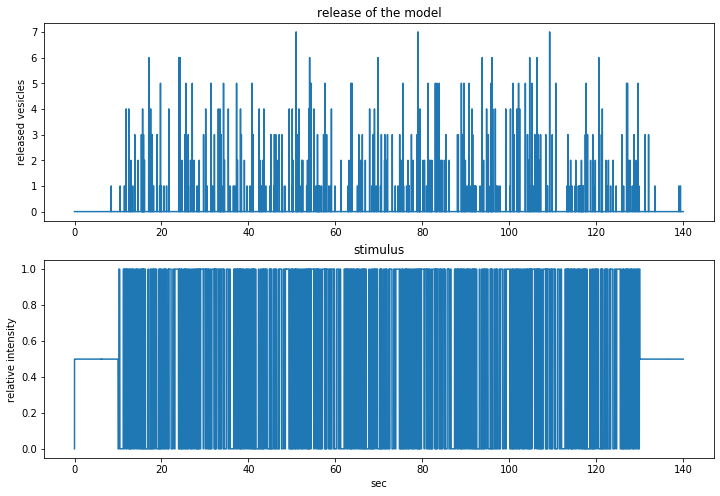

In [7]:
plt.figure(1, figsize=(12,8))

plt.subplot(211)
plt.title('release of the model')
plt.plot(dataT, fit[0])
plt.ylabel('released vesicles')

plt.subplot(212)
plt.title('stimulus')
plt.plot(stimT, stim)
plt.xlabel('sec')
plt.ylabel('relative intensity')



Text(0, 0.5, 'relative intensity')

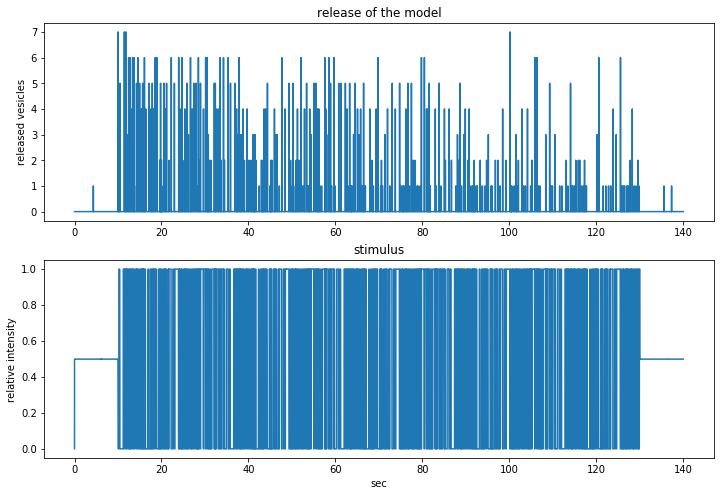

In [8]:
"""
plot of experimental data
"""

plt.figure(1, figsize=(12,8))

plt.subplot(211)
plt.title('release of the model')
plt.plot(dataT, data[1])
plt.ylabel('released vesicles')

plt.subplot(212)
plt.title('stimulus')
plt.plot(stimT, stim)
plt.xlabel('sec')
plt.ylabel('relative intensity')